<a href="https://colab.research.google.com/github/sachinthadilshann/UdemyMLProjects/blob/main/Used_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')




In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/sachinthadilshann/UdemyMLProjects/refs/heads/main/car%20data.csv')

In [63]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [65]:
df.isnull().sum()
#df.isnull().values.sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [66]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [67]:
for col in df.select_dtypes('object'):
    print(col,df[col].unique())
    print()

Car_Name ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'He

In [68]:
len(df['Car_Name'].unique())

98

In [69]:
df= df.drop('Car_Name',axis=1)

In [70]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [71]:
df['Current Year'] = 2024
df['Years old'] = df['Current Year'] - df['Year']


In [72]:
df.drop(columns= ['Year','Current Year'],axis=1,inplace=True)

In [73]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [74]:
for col in df.select_dtypes('object'):
    print(col,df[col].unique())
    print()

Fuel_Type ['Petrol' 'Diesel' 'CNG']

Seller_Type ['Dealer' 'Individual']

Transmission ['Manual' 'Automatic']



In [75]:
df = pd.get_dummies(df,drop_first=True)

In [76]:
for col in df.select_dtypes('bool'):
  df[col] = df[col].astype(int)
df.head(2)


,Selling_Price,Present_Price,Kms_Driven,Owner,Years old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1


In [77]:
df.shape

(301, 9)

<Axes: title={'center': 'Correlation with Selling Price'}>

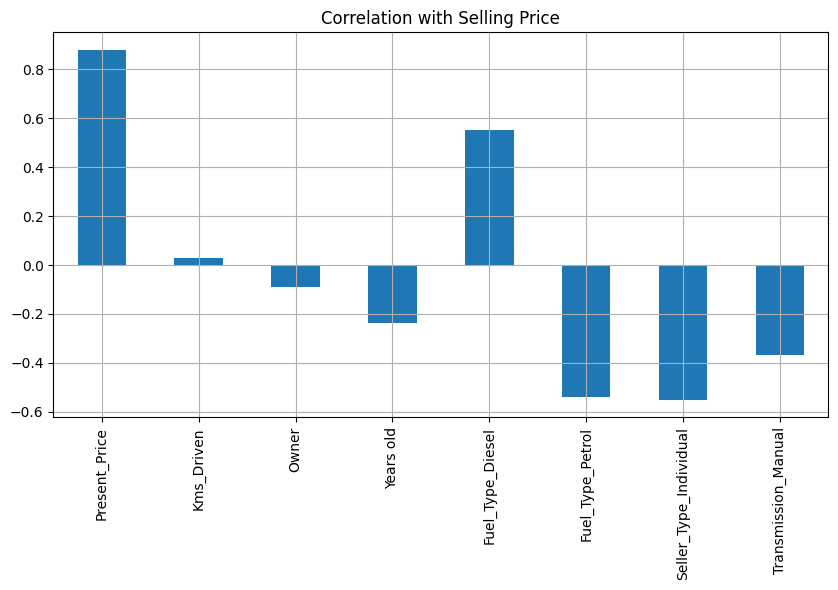

In [78]:
df_2 = df.drop('Selling_Price',axis=1)
df_2.corrwith(df['Selling_Price']).plot(kind='bar',
                                        figsize=(10,5),
                                        grid=True,
                                        title='Correlation with Selling Price')


In [79]:
x = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [82]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [83]:
y_pred_lr = model_lr.predict(x_test)


In [84]:
r2_score_lr = r2_score(y_test,y_pred_lr)*100
print(r2_score_lr)

84.89813024899065


In [85]:
mae_lr = mean_absolute_error(y_test,y_pred_lr)
print(mae_lr)

1.2162256821297064


In [86]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
y_pred_rf = model_rf.predict(x_test)

In [88]:
r2_score_rfr = r2_score(y_test,y_pred_rf)*100
print(r2_score_rfr)

96.70975605196311


In [89]:
mae_rfc = mean_absolute_error(y_test,y_pred_rf)
print(mae_rfc)

0.5988655737704923


In [90]:

results = {
    'Metric': ['R2 Score', 'MAE'],
    'Linear Regression': [r2_score_lr, mae_lr],
    'Random Forest': [r2_score_rfr, mae_rfc]
}

results_df = pd.DataFrame(results)

print(results_df)

     Metric  Linear Regression  Random Forest
0  R2 Score          84.898130      96.709756
1       MAE           1.216226       0.598866


In [91]:
result = {
    'Linear Regression': r2_score_lr,
    'Random Forest': r2_score_rfr
}

result= pd.DataFrame(list(result.items()),columns=['Model','R2 Score'])
print(result)

               Model   R2 Score
0  Linear Regression  84.898130
1      Random Forest  96.709756


In [92]:
df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1


In [93]:
obv_1 = [[5.59, 27000, 0, 10, 0, 1, 0, 1]]
scaled_obv_1 = sc.transform(obv_1)
model_rf.predict(scaled_obv_1)

array([3.8165])